In [25]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from mock_trade import MockTrade, Trade
from datetime import datetime
from backend import Backend
from frontend import Frontend
from cert import TiingoKey
from main import *

import matplotlib.pyplot as plt
from logging_config import set_quiet_mode

set_quiet_mode()


Style 'seaborn-v0_8' not available, using default


  0: SPY - 3939 rows
      Price range: 0.90 to 5.73
  1: BRK-B - 3939 rows
      Price range: 0.98 to 8.15
📈 Plotting comparison chart for 2 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest:    5.692 | Min:    0.902 | Max:    5.726 | Avg:    2.523
 BRK-B: Latest:    7.596 | Min:    0.981 | Max:    8.152 | Avg:    3.104
interest_rate (R): Latest:    4.283 | Min:    0.045 | Max:    5.451 | Avg:    1.355
cpi (R): Latest:    2.916 | Min:   -0.200 | Max:    9.060 | Avg:    2.586
unemployment_rate (R): Latest:    4.300 | Min:    3.400 | Max:   14.800 | Avg:    5.736
💡 Hover over the lines to see detailed information
💡 Use plt.show() to display the plot when ready


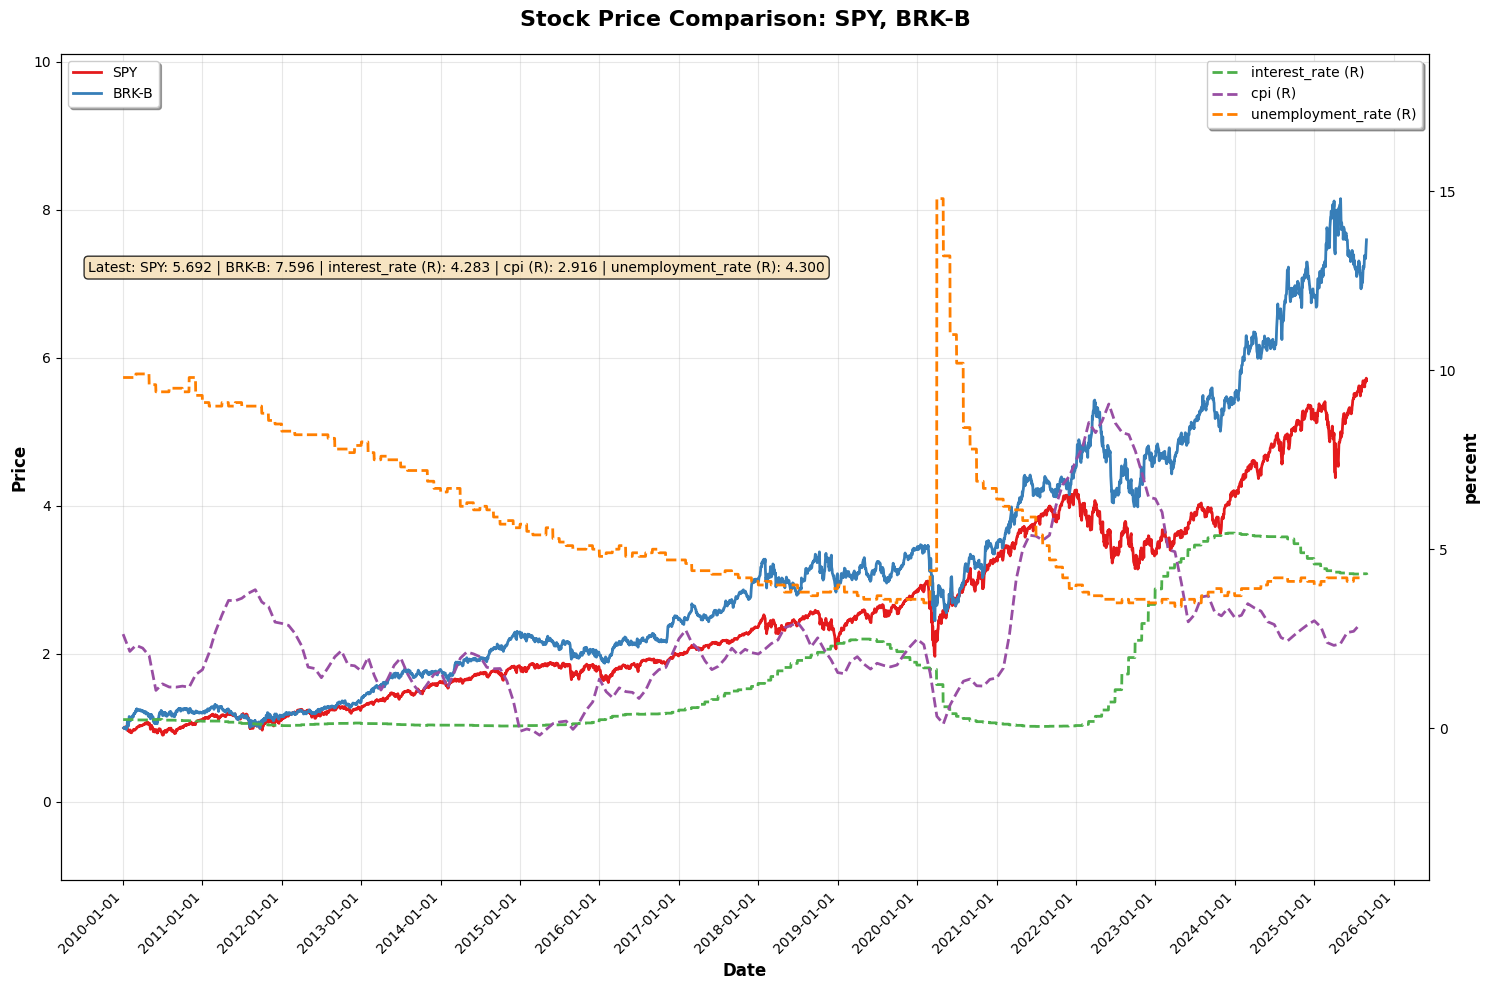

In [54]:
dfs = plot_prices(
    stocks=[
        StockConfig(symbol='SPY', normalize=True),
        StockConfig(symbol='BRK-B', normalize=True),
    ],
    environments=MacroConfig(
        interest_rate=True,
        cpi=True,
        unemployment_rate=True,
    ),
    start_date='2010-01-01', end_date='2025-09-01'
)


In [4]:
START_DATE = '2019-12-01'
END_DATE = '2023-02-06'


In [5]:
buy_recipe(
    1000000,
    1,
    {
        "SPY": 0.5,
        "TLT": 0.3,
        "IAU": 0.1,
        "DBC": 0.1,
    },
    START_DATE
)

Adjusted weekend date 2019-12-01 to business day 2019-12-02
Buy Recipe for 2019-12-02 with $1000000.00 ($1000000 × 100.0%):
--------------------------------------------------
SPY: 1604 shares @ $311.64 = $499870.56 (50.0% allocation)
TLT: 2169 shares @ $138.31 = $299994.39 (30.0% allocation)
IAU: 3576 shares @ $27.96 = $99984.96 (10.0% allocation)
DBC: 6540 shares @ $15.29 = $99996.60 (10.0% allocation)
--------------------------------------------------
Total cost: $999846.51 of $1000000.00 allocated
Remaining cash: $153.49


Style 'seaborn-v0_8' not available, using default


Using MockTrade for portfolio simulation...
Calculated initial investment: $999869.53
Portfolio initialized with $999869.53 cash

TRADE LOG                                                                       
#   Date         Action Symbol   Volume   Price      Value        Cash After   Holdings       
--------------------------------------------------------------------------------
1   2019-12-02   BUY    SPY      1925     $311.64    $599907.00   $399962.53   SPY:1925       

Current Holdings Summary:
----------------------------------------
SPY     :   1925 shares @ $  409.83 = $ 788922.75
----------------------------------------
Total   : $                 788922.75
Cash    : $                 399962.53
Portfolio: $                1188885.28
----------------------------------------
2   2019-12-02   BUY    TLT      1446     $138.31    $199996.26   $199966.27   TLT:1446       

Current Holdings Summary:
----------------------------------------
SPY     :   1925 shares @ $  409.83 = $ 

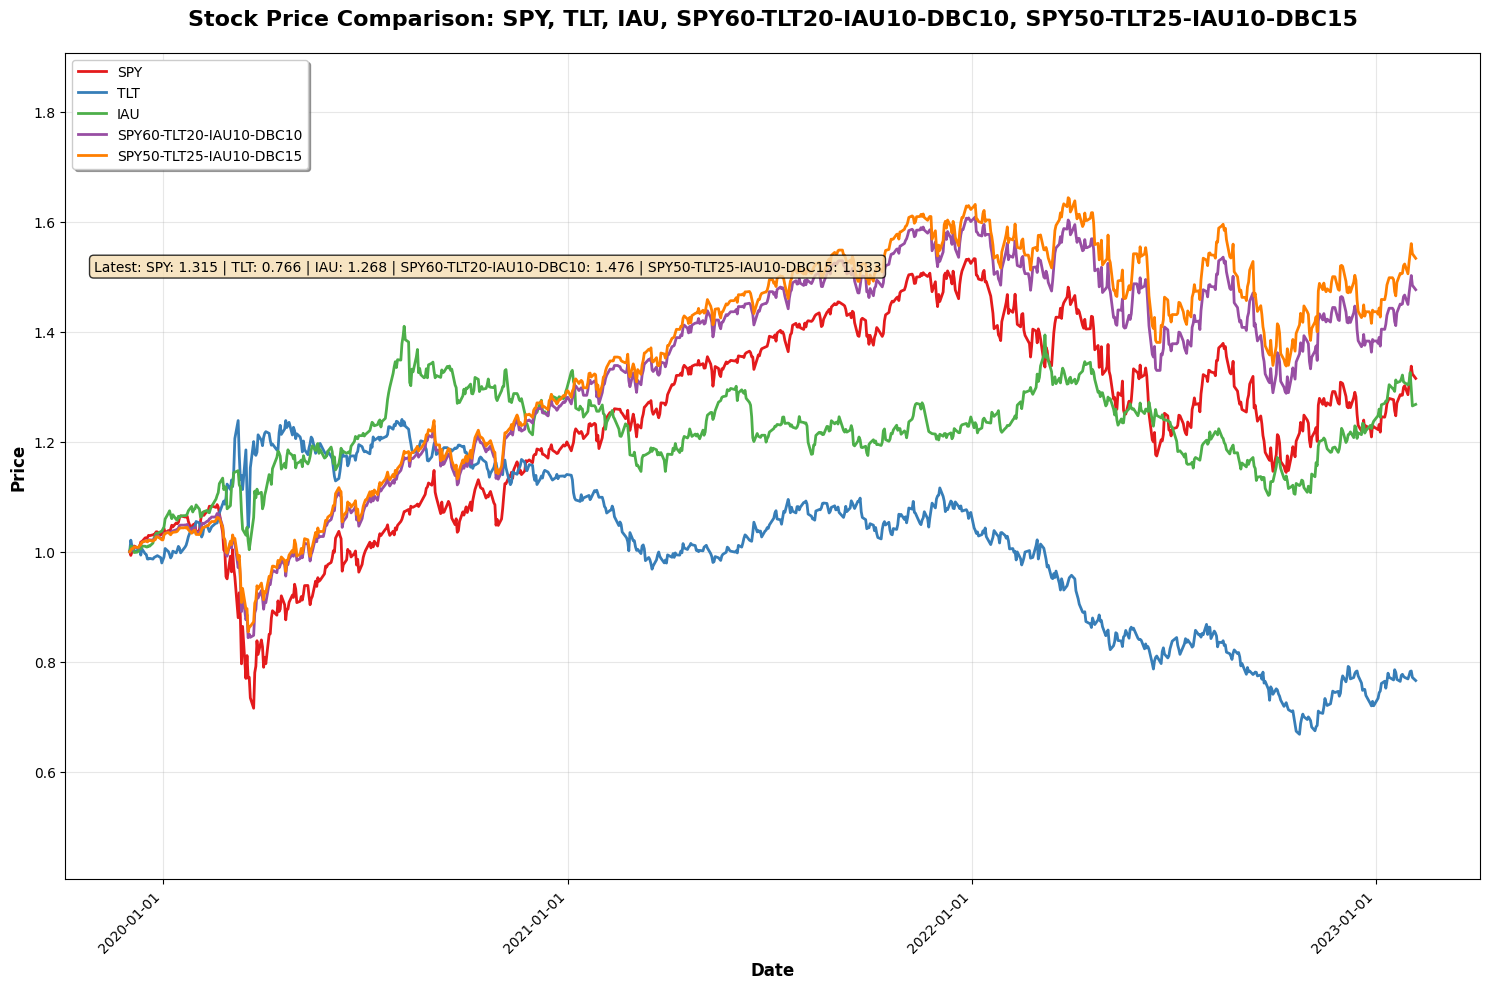

In [6]:
dfs = plot_prices(
    stocks=[
        StockConfig(symbol='SPY', normalize=True),
        StockConfig(symbol='TLT', normalize=True),
        StockConfig(symbol='IAU', normalize=True),
    ],
    portfolios=[
        MockPortfolio(
            name="SPY60-TLT20-IAU10-DBC10",
            trade_history=[
                Trade(symbol="SPY", volume=1925, date=START_DATE),
                Trade(symbol="TLT", volume=1446, date=START_DATE),
                Trade(symbol="IAU", volume=3576, date=START_DATE),
                Trade(symbol="DBC", volume=6539, date=START_DATE),
                Trade(symbol="TLT", volume=-1446, date='2020-04-20'),
                Trade(symbol="SPY", volume=INF, date='2020-04-21'),
                Trade(symbol="DBC", volume=-6540, date='2022-06-06'),
                Trade(symbol="SPY", volume=INF, date='2022-06-07'),
            ],
        ),
        MockPortfolio(
            name="SPY50-TLT25-IAU10-DBC15",
            trade_history=[
                Trade(symbol="SPY", volume=1604, date=START_DATE),
                Trade(symbol="TLT", volume=1807, date=START_DATE),
                Trade(symbol="IAU", volume=3576, date=START_DATE),
                Trade(symbol="DBC", volume=9807, date=START_DATE),
                Trade(symbol="TLT", volume=-1807, date='2020-04-20'),
                Trade(symbol="SPY", volume=INF, date='2020-04-21'),
                Trade(symbol="DBC", volume=-9807, date='2022-06-06'),
                Trade(symbol="SPY", volume=INF, date='2022-06-07'),
            ],
        ),
    ],
    # environments=MacroConfig(
    #     interest_rate=True,
    #     cpi=True,
    #     unemployment_rate=True,
    # ),
    start_date=START_DATE, end_date=END_DATE
)


In [28]:
portfolio = Portfolio.from_file("us_stock")
buy_recipe(
    1000000,
    3/100,
    portfolio.compositions,
    portfolio.date,
)

Buy Recipe for 2025-10-02 with $30000.00 ($1000000 × 3.0%):
--------------------------------------------------
BRK-B: Error getting price data - No data found for BRK-B in range 2025-10-02 to 2025-10-02. Available data range: 2000-01-03 to 2025-09-29
TLT: Error getting price data - No data found for TLT in range 2025-10-02 to 2025-10-02. Available data range: 2002-07-26 to 2025-09-30
DBC: Error getting price data - No data found for DBC in range 2025-10-02 to 2025-10-02. Available data range: 2006-02-06 to 2025-09-30
IAU: Error getting price data - No data found for IAU in range 2025-10-02 to 2025-10-02. Available data range: 2005-01-28 to 2025-09-30
--------------------------------------------------
Total cost: $0.00 of $30000.00 allocated
Remaining cash: $30000.00


In [27]:
Portfolio.from_file("us_stock")

Portfolio(name='us_stock', date='2025-10-02', compositions={'BRK-B': 0.5, 'TLT': 0.25, 'DBC': 0.15, 'IAU': 0.15})